In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# dataset_path = r'C:\Users\Raffa\Desktop\Università\X_informatics\AirQualityUCI\AirQualityUCI.csv'
# dataset = pd.read_csv(dataset_path, delimiter = ';')
# dataset

dataset_path = r'AirQualityUCI.xlsx'
dataset = pd.read_excel(dataset_path)
dataset

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [3]:
# We print the type of the columns because we want to analyze if there are some categorical variables.

for column in dataset.columns:
    print(column, ':' , dataset[column].dtype)

# In this case all the columns are numerical one (except the first two that represents the time stamp).

Date : datetime64[ns]
Time : object
CO(GT) : float64
PT08.S1(CO) : float64
NMHC(GT) : int64
C6H6(GT) : float64
PT08.S2(NMHC) : float64
NOx(GT) : float64
PT08.S3(NOx) : float64
NO2(GT) : float64
PT08.S4(NO2) : float64
PT08.S5(O3) : float64
T : float64
RH : float64
AH : float64


In [4]:
dataset.describe(include = 'all')

# For the columns with strings, NaN was returned for numeric operations

C:\Users\MARIELLA\AppData\Local\Temp\ipykernel_9272\189558127.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataset.describe(include = 'all')


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357,9357,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
unique,391,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2004-09-21 00:00:00,18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2004-03-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2005-04-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,NaN,NaN,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,NaN,NaN,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,NaN,NaN,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275


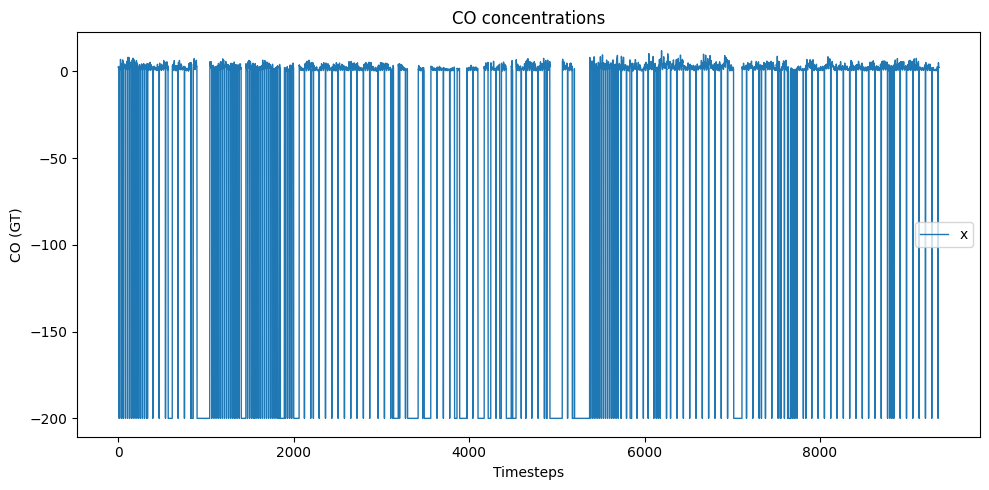

In [5]:
plt.figure(figsize=(10,5))
plt.plot(dataset.index, dataset['CO(GT)'], label='x', 
         linewidth=1)

# Add title and labels
plt.title('CO concentrations')
plt.xlabel('Timesteps')
plt.ylabel('CO (GT)')

# Add legend
plt.legend()

# Auto space
plt.tight_layout()

# Display plot
plt.show()

In [6]:
print(dataset.iloc[0,4])
len(dataset)

150


9357

In [7]:
#MISSING VALUES ARE REPRESENTED WITH '-200'

for element in dataset.columns:
    dataset.loc[dataset[element]==-200, element] = np.NAN

#OBSERVE THE NUMBER FOR MISSING DATA FOR EACH COLUMN
print(dataset.isnull().sum())

print('Total number of rows = ', len(dataset) )

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64
Total number of rows =  9357


We notice that the column NMHC contains a considerable number of Null values, so for our analysis we decide to remove this column.

In [8]:
del dataset['NMHC(GT)']

By looking at the number of Null values for columns we noticed that more columns have the same number, so we thought that maybe there are some rows (that is: some specific hours for some specific days) in which data were not properly collected. Let's check if there are some rows with more than one null value 

In [9]:
print(dataset[dataset['AH']. isnull()])


           Date      Time  CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  \
524  2004-04-01  14:00:00     1.7          NaN       NaN            NaN   
525  2004-04-01  15:00:00     1.9          NaN       NaN            NaN   
526  2004-04-01  16:00:00     2.3          NaN       NaN            NaN   
701  2004-04-08  23:00:00     2.0          NaN       NaN            NaN   
702  2004-04-09  00:00:00     2.4          NaN       NaN            NaN   
...         ...       ...     ...          ...       ...            ...   
8111 2005-02-11  17:00:00     6.6          NaN       NaN            NaN   
8112 2005-02-11  18:00:00     6.5          NaN       NaN            NaN   
8113 2005-02-11  19:00:00     7.1          NaN       NaN            NaN   
8114 2005-02-11  20:00:00     4.9          NaN       NaN            NaN   
8777 2005-03-11  11:00:00     3.0          NaN       NaN            NaN   

      NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)   T  RH  AH  
524      99.0        

In [15]:
# for example we select the 'AH' column. And we selct only the rows which has NaN for that column.
# print(dataset[dataset['AH']. isnull()])

# Now we visualize the number on NaN for each column for this restricted dataset

print(dataset[dataset['AH']. isnull()].isnull().sum())

# so we can say that the 366 rows with NaN are the same for :
# PT08.S1(CO), C6H6(GT), PT08.S2(NMHC), PT08.S3(NOx), PT08.S4(NO2),PT08.S5(O3), T, RH, AH 

Date               0
Time               0
CO(GT)            36
PT08.S1(CO)      366
C6H6(GT)         366
PT08.S2(NMHC)    366
NOx(GT)           44
PT08.S3(NOx)     366
NO2(GT)           44
PT08.S4(NO2)     366
PT08.S5(O3)      366
T                366
RH               366
AH               366
dtype: int64


In [23]:
dataset = dataset.where(dataset != -200)
dataset

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [24]:
dataset = dataset.fillna(dataset.mean())
dataset

C:\Users\MARIELLA\AppData\Local\Temp\ipykernel_19524\1369773706.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  dataset = dataset.fillna(dataset.mean())
C:\Users\MARIELLA\AppData\Local\Temp\ipykernel_19524\1369773706.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset = dataset.fillna(dataset.mean())


,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [143]:
dataset.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,9357,391,21/09/2004,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,9357,24,18:00:00,390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO(GT),9357.0,NaN,NaN,NaN,2.15275,1.316068,0.1,1.2,2.15275,2.6,11.9
PT08.S1(CO),9357.0,NaN,NaN,NaN,1099.833166,212.791672,647.0,941.0,1075.0,1221.0,2040.0
NMHC(GT),9357.0,NaN,NaN,NaN,218.811816,63.870229,7.0,218.811816,218.811816,218.811816,1189.0
C6H6(GT),9357.0,NaN,NaN,NaN,10.083105,7.30265,0.1,4.6,8.6,13.6,63.7
PT08.S2(NMHC),9357.0,NaN,NaN,NaN,939.153376,261.560236,383.0,743.0,923.0,1105.0,2214.0
NOx(GT),9357.0,NaN,NaN,NaN,246.896735,193.426632,2.0,112.0,229.0,284.0,1479.0
PT08.S3(NOx),9357.0,NaN,NaN,NaN,835.493605,251.743954,322.0,666.0,818.0,960.0,2683.0
NO2(GT),9357.0,NaN,NaN,NaN,113.091251,43.920954,2.0,86.0,113.091251,133.0,340.0


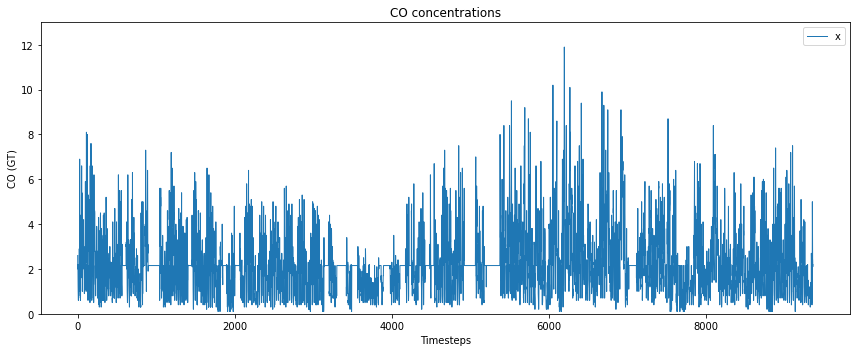

In [144]:
plt.figure(figsize=(12,5))
plt.plot(dataset.index, dataset['CO(GT)'], label='x', 
         linewidth=1)

# Add title and labels
plt.title('CO concentrations')
plt.xlabel('Timesteps')
plt.ylabel('CO (GT)')
plt.ylim(0,13)


# Add legend
plt.legend()

# Auto space
plt.tight_layout()

# Display plot
plt.show()

<AxesSubplot:>

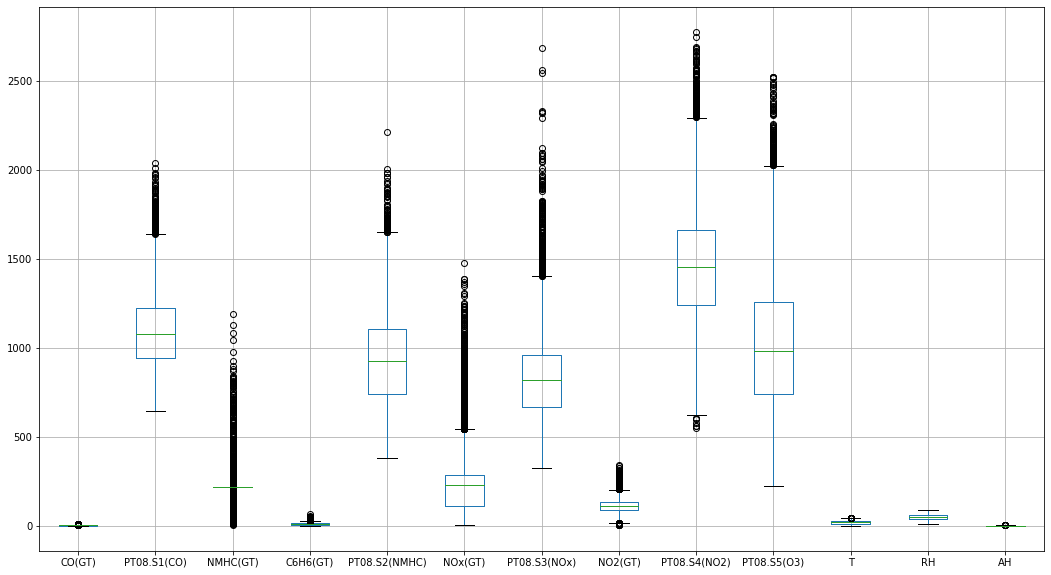

In [145]:
dataset.boxplot(figsize= (18,10))

## CORRELATION MATRIX

In [19]:
# calculate the correlation matrix
corr = dataset.corr()

# plot the correlation matrix (but only half matrix)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

C:\Users\MARIELLA\AppData\Local\Temp\ipykernel_19524\1586975503.py:8: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr


,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
PT08.S1(CO),0.88,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
C6H6(GT),0.93,0.88,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
PT08.S2(NMHC),0.92,0.89,0.98,nan,nan,nan,nan,nan,nan,nan,nan,nan
NOx(GT),0.80,0.71,0.72,0.70,nan,nan,nan,nan,nan,nan,nan,nan
PT08.S3(NOx),-0.70,-0.77,-0.74,-0.80,-0.66,nan,nan,nan,nan,nan,nan,nan
NO2(GT),0.68,0.64,0.61,0.65,0.76,-0.65,nan,nan,nan,nan,nan,nan
PT08.S4(NO2),0.63,0.68,0.77,0.78,0.23,-0.54,0.16,nan,nan,nan,nan,nan
PT08.S5(O3),0.85,0.90,0.87,0.88,0.79,-0.80,0.71,0.59,nan,nan,nan,nan
T,0.02,0.05,0.20,0.24,-0.27,-0.15,-0.19,0.56,-0.03,nan,nan,nan


In [146]:
#Analysing relationship between different features
# cor_cols = ['pollution', 'wnd_spd', 'rain', 'snow', 'temp']
cor_cols = dataset.columns
correlation = dataset.corr()
correlation.style.background_gradient(cmap='coolwarm')

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.773394,0.289975,0.812361,0.795578,0.762273,-0.613877,0.646349,0.558232,0.759027,0.020257,0.043198,0.043274
PT08.S1(CO),0.773394,1.000000,0.278282,0.883795,0.892964,0.615941,-0.771938,0.562843,0.682881,0.899324,0.048627,0.114606,0.135324
NMHC(GT),0.289975,0.278282,1.000000,0.281928,0.279761,0.098180,-0.261997,0.156510,0.232979,0.240592,0.066782,-0.052784,0.037173
C6H6(GT),0.812361,0.883795,0.281928,1.000000,0.981950,0.616801,-0.735744,0.535919,0.765731,0.865689,0.198956,-0.061681,0.167972
PT08.S2(NMHC),0.795578,0.892964,0.279761,0.981950,1.000000,0.601773,-0.796703,0.561180,0.777254,0.880578,0.241373,-0.090380,0.186933
NOx(GT),0.762273,0.615941,0.098180,0.616801,0.601773,1.000000,-0.563270,0.763074,0.205485,0.688205,-0.235636,0.192587,-0.126868
PT08.S3(NOx),-0.613877,-0.771938,-0.261997,-0.735744,-0.796703,-0.563270,1.000000,-0.569479,-0.538468,-0.796569,-0.145112,-0.056740,-0.232017
NO2(GT),0.646349,0.562843,0.156510,0.535919,0.561180,0.763074,-0.569479,1.000000,0.140655,0.629443,-0.165466,-0.080569,-0.291392
PT08.S4(NO2),0.558232,0.682881,0.232979,0.765731,0.777254,0.205485,-0.538468,0.140655,1.000000,0.591144,0.561270,-0.032188,0.629641
PT08.S5(O3),0.759027,0.899324,0.240592,0.865689,0.880578,0.688205,-0.796569,0.629443,0.591144,1.000000,-0.027172,0.124956,0.070751


## NORMALIZATION
Using min-max normalization:

In [25]:
#Normalising data
from sklearn.preprocessing import MinMaxScaler

df = dataset.drop(columns = ['Date', 'Time'])
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df.values)

'''df = dataset.drop(columns = ['Date', 'Time'])
df = (df-df.min())/(df.max()-df.min())'''
df = pd.DataFrame(df_scaled, columns = df.columns)
df

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.211864,0.511849,0.184498,0.361737,0.111036,0.311024,0.328694,0.513040,0.454654,0.333333,0.499057,0.280046
1,0.161017,0.463196,0.145428,0.312167,0.068382,0.360796,0.266509,0.453125,0.326382,0.326882,0.484287,0.264279
2,0.177966,0.542011,0.139148,0.303701,0.087339,0.346500,0.331655,0.451214,0.370588,0.296774,0.563168,0.276374
3,0.177966,0.522980,0.142780,0.308617,0.115098,0.326168,0.355345,0.464366,0.426741,0.277419,0.638906,0.294198
4,0.127119,0.448833,0.100156,0.247030,0.087339,0.374034,0.337578,0.422212,0.386228,0.280645,0.633564,0.295215
...,...,...,...,...,...,...,...,...,...,...,...,...
9352,0.254237,0.478995,0.210411,0.392189,0.318009,0.091708,0.556115,0.370166,0.654936,0.510753,0.252357,0.279592
9353,0.194915,0.370018,0.176218,0.351632,0.237847,0.119348,0.524726,0.320369,0.455306,0.563978,0.182904,0.257621
9354,0.194915,0.355296,0.192248,0.371023,0.197021,0.119136,0.511401,0.310139,0.378408,0.619355,0.115336,0.222820
9355,0.169492,0.255117,0.147787,0.315308,0.157414,0.160754,0.455138,0.220324,0.238406,0.650000,0.054997,0.160865


In [148]:
df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
CO(GT),9357.0,0.173962,0.111531,0.0,0.093220,0.173962,0.211864,1.0
PT08.S1(CO),9357.0,0.325078,0.152758,0.0,0.211055,0.307251,0.412060,1.0
NMHC(GT),9357.0,0.179198,0.054036,0.0,0.179198,0.179198,0.179198,1.0
C6H6(GT),9357.0,0.156967,0.114822,0.0,0.070755,0.133648,0.212264,1.0
PT08.S2(NMHC),9357.0,0.303743,0.142851,0.0,0.196614,0.294921,0.394320,1.0
NOx(GT),9357.0,0.165807,0.130959,0.0,0.074475,0.153690,0.190928,1.0
PT08.S3(NOx),9357.0,0.217490,0.106626,0.0,0.145701,0.210080,0.270224,1.0
NO2(GT),9357.0,0.328672,0.129944,0.0,0.248521,0.328672,0.387574,1.0
PT08.S4(NO2),9357.0,0.407043,0.152593,0.0,0.310701,0.407043,0.499550,1.0
PT08.S5(O3),9357.0,0.348352,0.169684,0.0,0.226325,0.331017,0.449175,1.0


## Obiettivo
Obiettivo: prevedere la quantità di CO considerando i 2 giorni precedenti (ovvero 24*2).
Devo operare in questo modo:
- dividere il dataset in 2 tensori: X = tensore (:, )
- splittare il dataset in train, validation e test. Facciamo 7500 di train e 1500 di test. Al dataset di train applicheremo un validation split di 0.2;

In [26]:
lookback = 24*2
step = 1
delay = 24
batch_size = 1
train_size = int(len(df)*0.85)
test_size = len(df) - train_size
print(train_size, test_size)

7953 1404


In [28]:
#Creating a window for previous data
def to_supervised(train, lookback):
  X = []
  Y = []
  for i in range(lookback, len(train)):
    X.append(train.iloc[i-lookback:i,:])
    Y.append(train.iloc[i,0:1])
    
  return X,Y

In [29]:
X, Y = to_supervised(train = df, lookback = lookback)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)

#per ogni elemento che voglio prevedere (Y) ho a disposizion come un mini dataset 
# fatto dalle 48 osservazioni precedenti, quindi di size 48*13 (ho 13 colonne)

Y (9309, 1)
X (9309, 48, 12)


In [30]:
#Splitting the dataset
#USIAMO LA FUNZIONE DI SKLEARN TRAIN_TEST_SPLIT

X_train, X_test = X[:train_size,] , X[train_size:,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[:train_size,0:1] , Y[train_size:,0:1]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (7953, 48, 12)
X_test (1356, 48, 12)
Y_train (7953, 1)
Y_test (1356, 1)


In [174]:
#Importing LSTM model
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
model_lstm_1 = Sequential()

model_lstm_1.add(LSTM(units = 32, return_sequences = False, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm_1.add(Dense(units = 1))

model_lstm_1.compile(optimizer = 'adam', loss = 'mean_squared_error')
#Train the model
lstm_1 = model_lstm_1.fit(X_train, Y_train, epochs = 20, batch_size = 30, validation_split = 0.2)
lstm_1
model_lstm_1.save('air_pollution_lstm_1.h5')

Epoch 1/20
213/213 [==============================] - 5s 17ms/step - loss: 0.0114 - val_loss: 0.0084
Epoch 2/20
213/213 [==============================] - 3s 15ms/step - loss: 0.0048 - val_loss: 0.0065
Epoch 3/20
213/213 [==============================] - 3s 14ms/step - loss: 0.0040 - val_loss: 0.0062
Epoch 4/20
213/213 [==============================] - 3s 16ms/step - loss: 0.0037 - val_loss: 0.0054
Epoch 5/20
213/213 [==============================] - 3s 14ms/step - loss: 0.0034 - val_loss: 0.0058
Epoch 6/20
213/213 [==============================] - 3s 14ms/step - loss: 0.0034 - val_loss: 0.0046
Epoch 7/20
213/213 [==============================] - 3s 15ms/step - loss: 0.0033 - val_loss: 0.0045
Epoch 8/20
213/213 [==============================] - 3s 15ms/step - loss: 0.0033 - val_loss: 0.0044
Epoch 9/20
213/213 [==============================] - 3s 15ms/step - loss: 0.0032 - val_loss: 0.0044
Epoch 10/20
213/213 [==============================] - 4s 17ms/step - loss: 0.0032 - val_lo

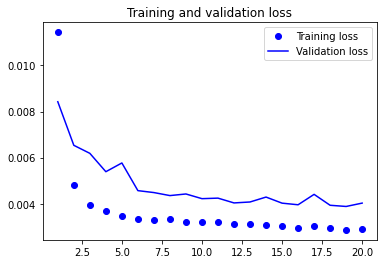

In [175]:
loss = lstm_1.history['loss']
val_loss = lstm_1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [169]:
model_lstm_dropout_1 = Sequential()

model_lstm_dropout_1.add(LSTM(units = 32, return_sequences = False, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm_dropout_1.add(Dropout(0.2))
model_lstm_dropout_1.add(Dense(units = 1))

model_lstm_dropout_1.compile(optimizer = 'adam', loss = 'mean_squared_error')
#Train the model
lstm_dropout_1 = model_lstm_dropout_1.fit(X_train, Y_train, epochs = 20, batch_size = 30, validation_split = 0.2)
lstm_dropout_1
model_lstm_dropout_1.save('air_pollution_lstm_dropout_1.h5')

Epoch 1/20
213/213 [==============================] - 6s 19ms/step - loss: 0.0157 - val_loss: 0.0186
Epoch 2/20
213/213 [==============================] - 4s 17ms/step - loss: 0.0113 - val_loss: 0.0163
Epoch 3/20
213/213 [==============================] - 3s 16ms/step - loss: 0.0111 - val_loss: 0.0166
Epoch 4/20
213/213 [==============================] - 3s 16ms/step - loss: 0.0108 - val_loss: 0.0162
Epoch 5/20
213/213 [==============================] - 3s 16ms/step - loss: 0.0108 - val_loss: 0.0179
Epoch 6/20
213/213 [==============================] - 3s 16ms/step - loss: 0.0107 - val_loss: 0.0171
Epoch 7/20
213/213 [==============================] - 4s 17ms/step - loss: 0.0106 - val_loss: 0.0177
Epoch 8/20
213/213 [==============================] - 3s 16ms/step - loss: 0.0106 - val_loss: 0.0170
Epoch 9/20
213/213 [==============================] - 4s 17ms/step - loss: 0.0106 - val_loss: 0.0162
Epoch 10/20
213/213 [==============================] - 3s 16ms/step - loss: 0.0105 - val_lo

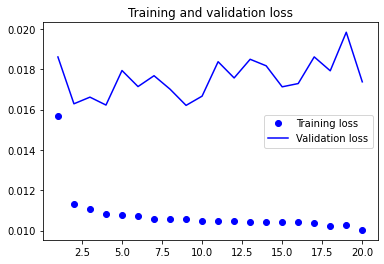

In [170]:
loss = lstm_dropout_1.history['loss']
val_loss = lstm_dropout_1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [177]:
Y_pred = model_lstm_1.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)

rmse = np.sqrt(mse)
rmse

43/43 [==============================] - 0s 5ms/step
[[0.05941197]
 [0.09013253]
 [0.04698601]
 ...
 [0.18526413]
 [0.20747882]
 [0.18518253]] (1356, 1)


0.05676107818082015

In [183]:
print(Y_pred.shape, Y_test.shape, df.shape)

(1356, 1) (1356, 1) (9357, 13)


In [190]:
#Scaling back to the original scale
df_test_truncated = df.iloc[train_size+lookback:,1:]
#print(df_truncated.shape)
#print('Y_pred',Y_pred.shape)
df_test_with_Y_predicted = np.concatenate((df_test_truncated.iloc[:,:],Y_pred), axis =1)
print('concat y_pred',Y_pred.shape)
df_test_with_Y_tested = np.concatenate((df_test_truncated.iloc[:,:], Y_test), axis = 1)
print('concat Y_test', Y_test.shape)

concat y_pred (1356, 1)
concat Y_test (1356, 1)


In [191]:
Y_predicted = scaler.inverse_transform(df_test_with_Y_predicted)
Y_tested = scaler.inverse_transform(df_test_with_Y_tested)
Y_predicted = Y_predicted[:,12:13]
Y_tested = Y_tested[:,12:13]
print('Y_tested', Y_tested.shape)
print('Y_predicted', Y_predicted.shape)

Y_tested (1356, 1)
Y_predicted (1356, 1)


In [192]:
mse = mean_squared_error(Y_tested, Y_predicted)

rmse = np.sqrt(mse)
rmse

0.11615019428141228

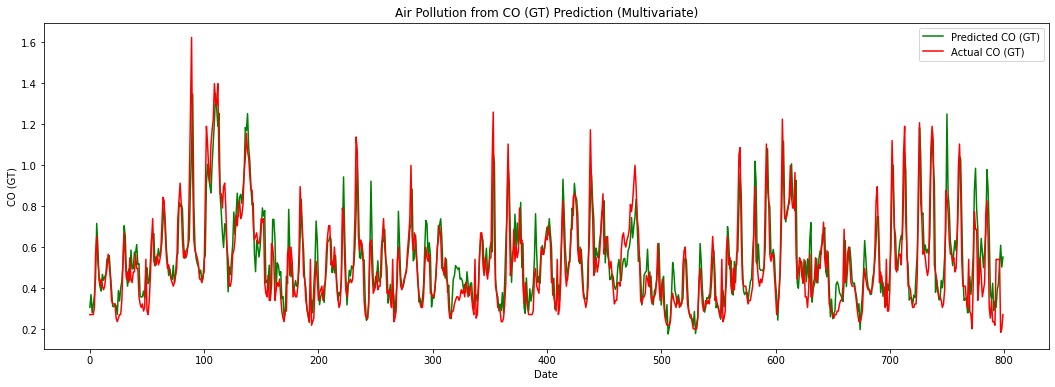

<Figure size 432x288 with 0 Axes>

In [197]:
#Plot the graph between actual vs predicted values
plt.figure(figsize=(18,6))  
plt.plot(Y_predicted[:800,:], color= 'green',label = 'Predicted CO (GT)')
plt.plot(Y_tested[:800,:] , color = 'red',label = 'Actual CO (GT)')
plt.title("Air Pollution from CO (GT) Prediction (Multivariate)")
plt.xlabel("Date")
plt.ylabel("CO (GT)")
plt.legend()
plt.show()
plt.savefig('graph.png')

# BIDIRECTIONAL LSTM

In [34]:
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb


ModuleNotFoundError: No module named 'tensorflow.python'

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [ ]:
history=model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=12,
          validation_data=[X_test, Y_test])
print(history.history['loss'])
print(history.history['accuracy']) 

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('model loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show() 